# 2022-2-18
# 本代码绘制论文中的图2，垂直经向的温度梯度

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

In [2]:
f0      =  xr.open_dataset("/home/sun/qomo-data/composite3.nc").sel(lat=slice(-10,30),lon=slice(80,100),level=slice(1000,200))
tem_avg =  np.average(np.nanmean(f0.T.data[0:30,:],axis=3),axis=0)

/tmp/ipykernel_447862/1894736144.py:2: RuntimeWarning: Mean of empty slice
  tem_avg =  np.average(np.nanmean(f0.T.data[0:30,:],axis=3),axis=0)


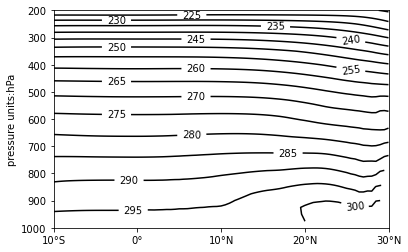

In [3]:
x_tick_label  =  []
for xx in range(-10,31,10):
    x_tick_label.append(u''+str(xx)+"\N{DEGREE SIGN}N")
    
x_tick_label[0]  =  u''+str(10)+"\N{DEGREE SIGN}S"
x_tick_label[1]  =  u''+str(0)+"\N{DEGREE SIGN}"

y_tick_label  =  []
for yy in range(200,1001,100):
    y_tick_label.append(u''+str(yy)+" hPa")
    
fig  =  plt.figure()
ax   =  fig.add_subplot(111)

im   =  ax.contour(f0.lat,f0.level,tem_avg,levels=np.linspace(220,300,17),colors='k')
ax.clabel(im, inline=1, fontsize=10)

ax.set_xticks(np.linspace(-10,30,5))
ax.set_xticklabels(x_tick_label)

ax.set_ylabel("pressure units:hPa")

#ax.set_yticklabels(y_tick_label)

plt.gca().invert_yaxis()

plt.savefig("/home/sun/paint/lunwen/version2.0/lunwen_v2.0_fig2_vertical_tem.pdf",dpi=350)

In [32]:
x_tick_label[0][4]

'N'

In [12]:
np.nanmin(tem_avg)

219.2302557531029

In [19]:
f0.level

<xarray.DataArray 'level' (level: 23)>
array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,  775.,
        750.,  725.,  700.,  650.,  600.,  550.,  500.,  450.,  400.,  350.,
        300.,  250.,  200.])
Coordinates:
  * level    (level) float64 1e+03 975.0 950.0 925.0 ... 350.0 300.0 250.0 200.0
Attributes:
    standard_name:  air_pressure
    long_name:      pressure
    units:          hPa
    positive:       down
    axis:           Z